# Check point: First step in Machine Learning

## Ali LAMINE

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing dataset
data=pd.read_csv("C:/Users/LENOVO/Desktop/kc_house_data.csv")
data.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

### 1. Explore this dataset using what you have learned in data preprocessing and data visualization 

In [3]:
data.shape

(21613, 21)

Dataset contains 21 columns (features) and 21613 rows (Houses)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

All columns are numerical except "date". We should transform it to DateTime object.
No missing values!!!!

Database Description
The dataset consists of house prices from King County an area in the US State of Washington, this data also covers Seattle. 
Variables Description Data Type
id a notation for a house Numeric
date Date house was sold String
price Price is prediction target Numeric
bedrooms Number of Bedrooms/House Numeric
bathrooms Number of bathrooms/bedrooms Numeric
sqftliving square footage of the home Numeric 
sqftlot square footage of the lot Numeric
floors Total floors (levels) in house Numeric
waterfront House which has a view to a waterfront Numeric
view Has been viewed Numeric
condition How good the condition is ( Overall ). 1 indicates worn out property and 5 excellent. Numeric
grade overall grade given to the housing unit, based on King County grading system. 1 poor ,13 excellent. Numeric
sqftabove square footage of house apart from basement Numeric 
sqftbasement square footage of the basement Numeric
yrbuilt Built Year Numeric yrrenovated Year when house was renovated Numeric
zipcode zip Numeric
lat Latitude coordinate Numeric
long Longitude coordinate Numeric
sqftliving15 Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area Numeric 
sqftlot15 lotSize area in 2015(implies-- some renovations) Numeric

In [5]:
data["date"]=pd.to_datetime(data["date"])

In [6]:
# standard statistics
data.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517      0.766318      0.650743   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068800e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21613.000000  21613.000000   21613.000000  21613.000000  21613.000000   
mean       7.656873   1788.390691     291.509045   1971.005136     84.402258   
std        1.175459    828.090978     442.575043     29.373411    401.679240   
min        1.000000    290.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2210.000000     560.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21613.000000  21613.000000  21613.000000   21613.000000   21613.000000  
mean   98077.939805     47.560053   -122.213896    1986.552492   12768.455652  
std       53.505026      0.138564      0.140828     685.391304   27304.179631  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471000   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.230000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


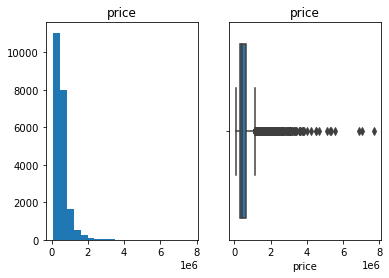

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


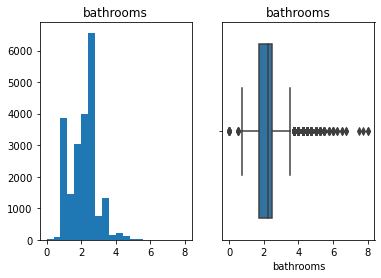

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


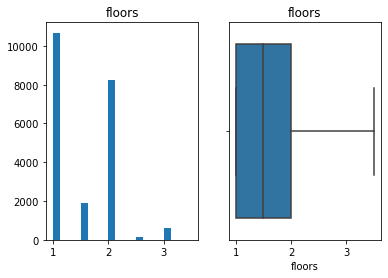

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


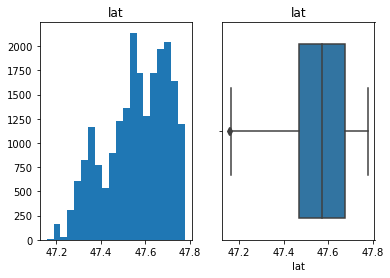

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


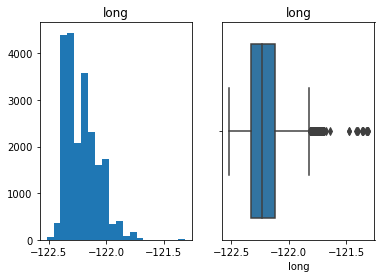

In [7]:
# Data Visualization
for col in data.columns:
    if data[col].dtypes=="float64":
        plt.subplot(1,2,1)
        plt.hist(data[col], bins=20)
        plt.title(col)
        plt.subplot(1,2,2)
        sns.boxplot(data[col], orient="h")
        plt.title(col)
        plt.show()

Price:a lot of outliers, mean of 0.54 10e6, skewed
Bathrooms: between 0 and 8, mean of 2.11, a lot of outliers
Floors: between 0 and 3.5, mean of 1.5, most of houses have 1 or 2 floors
Lat: Most of the houses are located between 47.5 and 47.65 of latitude
Long: Most of the houses are located between -122.2 and -122.4

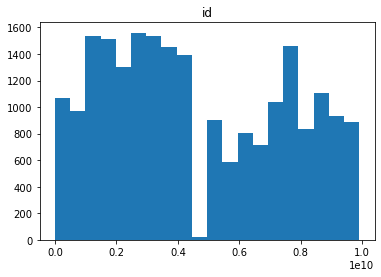

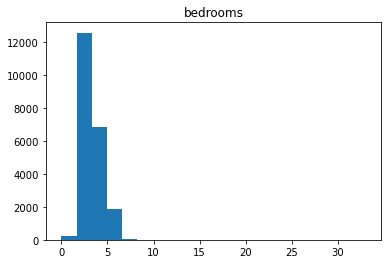

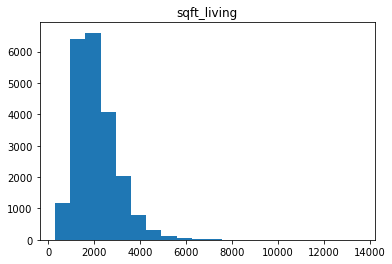

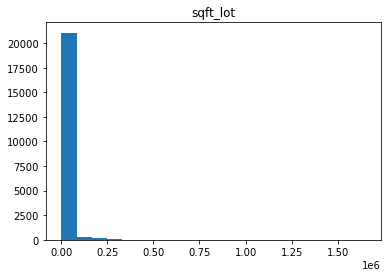

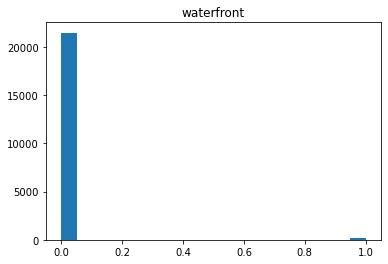

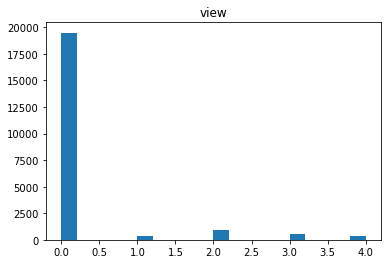

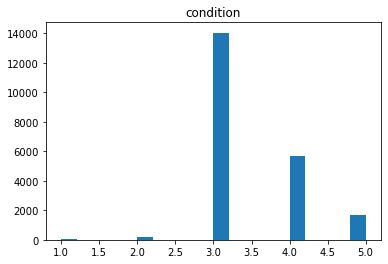

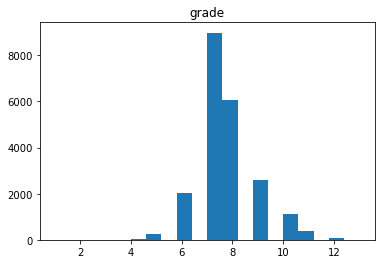

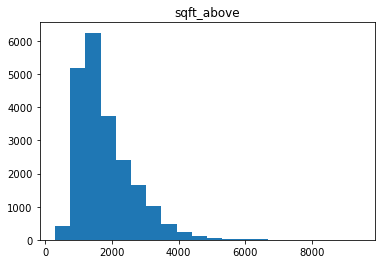

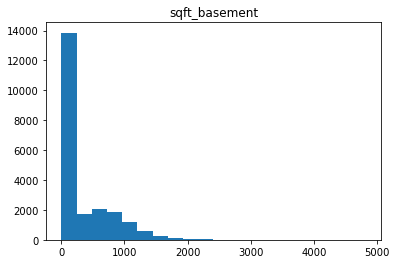

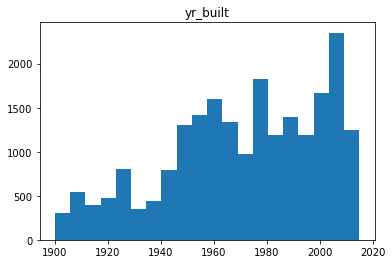

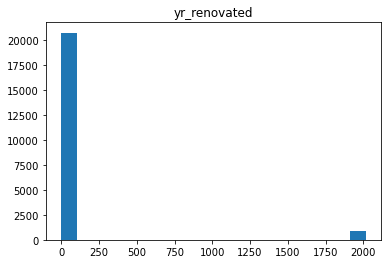

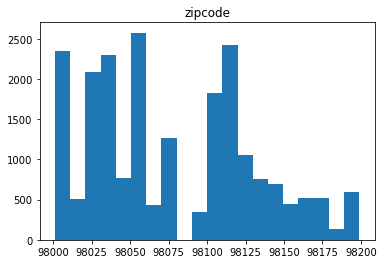

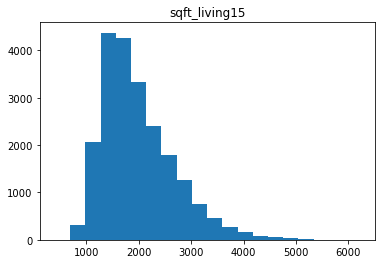

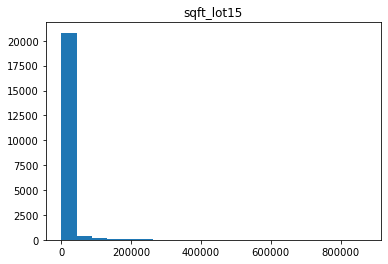

In [8]:
for col in data.columns:
    if data[col].dtypes=="int64":
        plt.hist(data[col], bins=20)
        plt.title(col)
        plt.show()

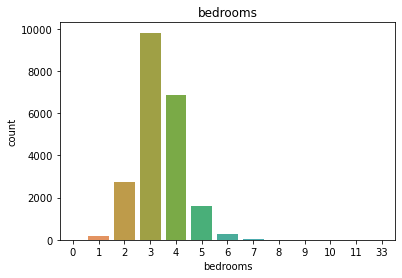

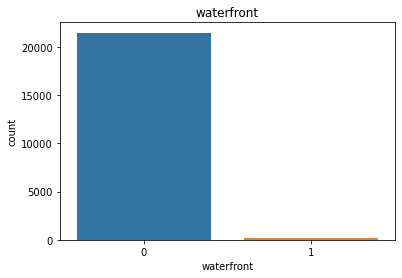

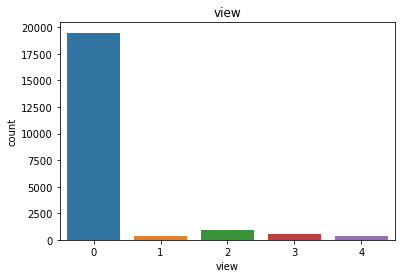

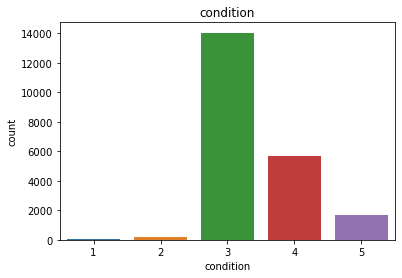

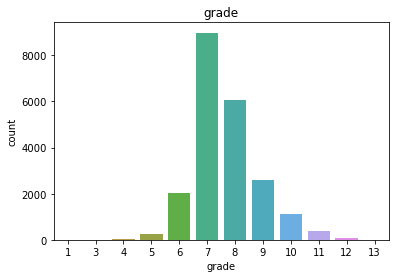

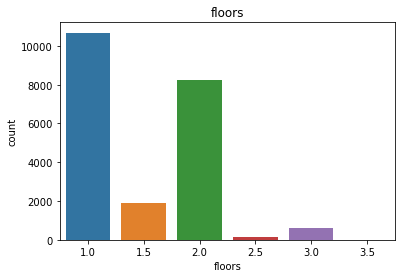

In [9]:
lis=["bedrooms","waterfront","view","condition","grade", "floors"]
for i in lis:
    sns.countplot(x=i, data=data)
    plt.title(i)
    plt.show()

id if almost uniform (not of big interest)
Bedromms between 0 and 30, mean of 2.11, skewed
sqft_living, skewed, most of houses between 1500 and 3000
sqft_lot, skewed, the majority of houses has zero lot (what does lot means?)
waterfront: (yes/no response), the majority has no waterfront
View: (0/1/2/3/4) the majority has 0 view
Condition: the majority has a medium condition (3/5)
Grade: the majority has a grade between 7 and 8/13 (medium)
sqft_above: skewed, the majority has less than 2000 ft2
sqft_basement: the majority has no basement 
yr_built: the majority of houses was built after the 50's, 3 picks 1955, 1975 and 2010
yr_renovated: the majority of houses wasn't renovated 
zipcode: a possible correlation with lat and long? (not important)
sqft_living15: skewed, majority between 1000 and 3000
sqft_lot15: the majority wasn't renovated in 2015 

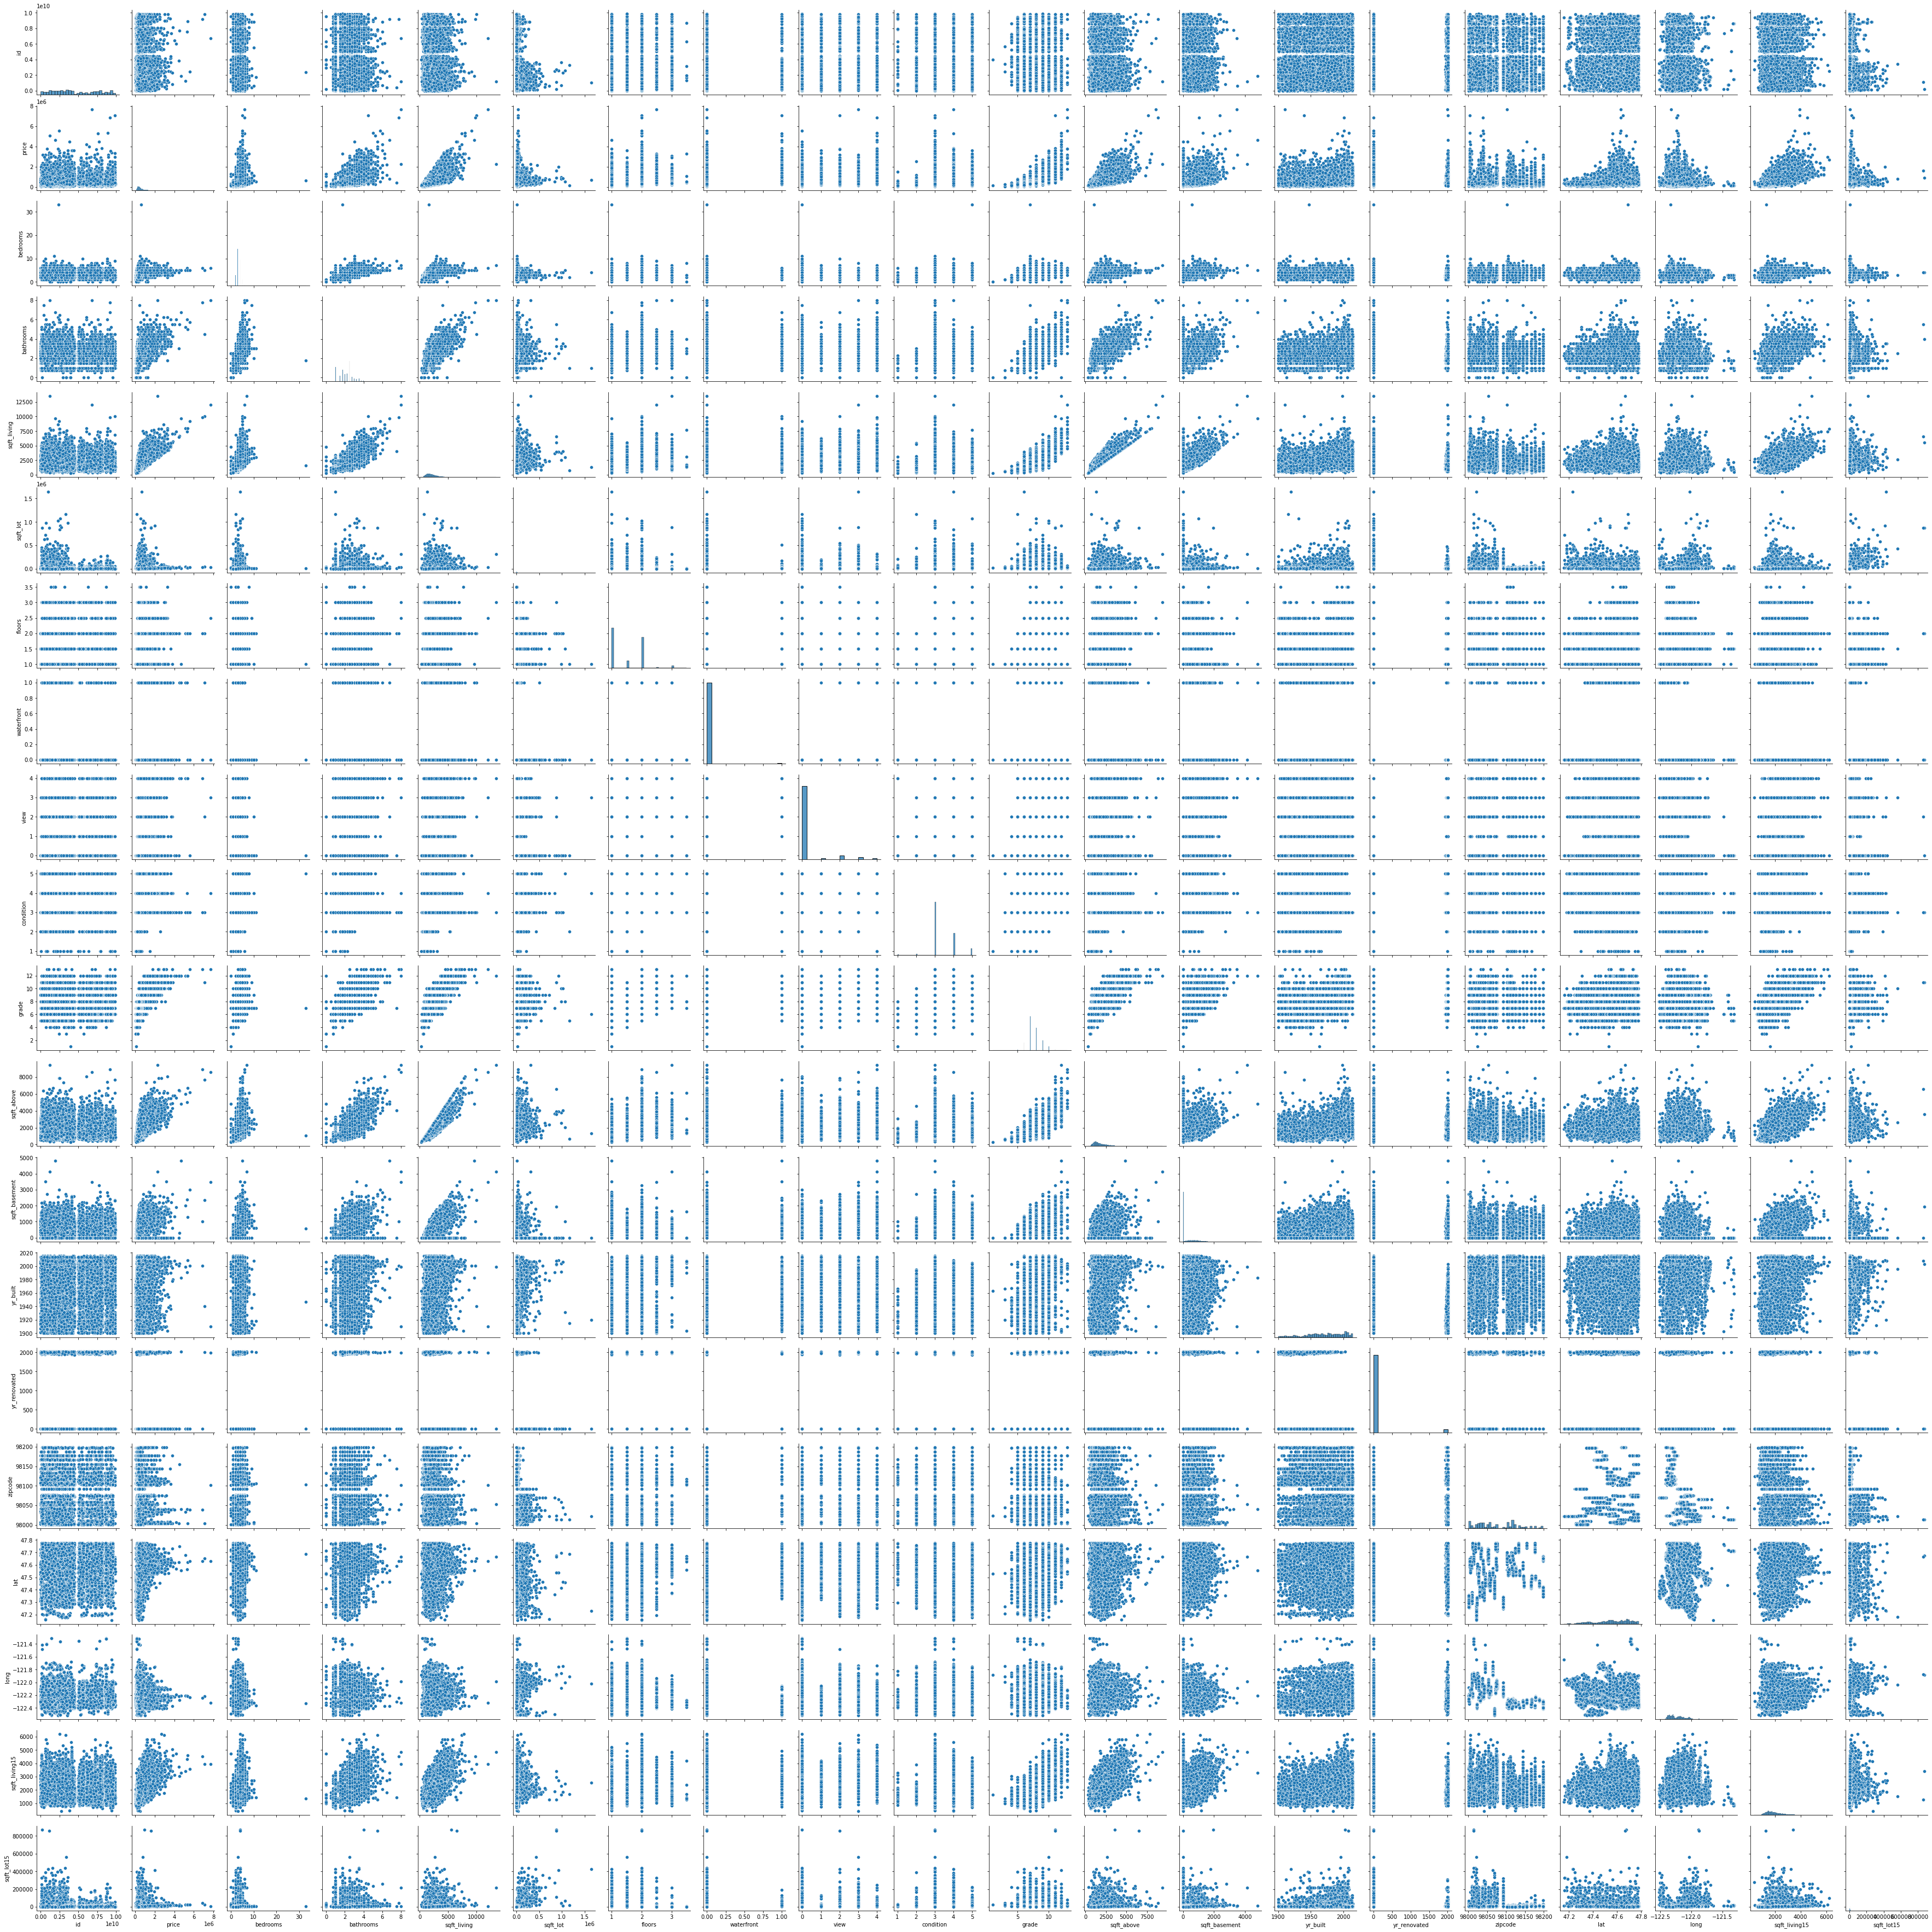

In [10]:
sns.pairplot(data)

In [11]:
corr_df = data.corr()

In [12]:
corr_df

id     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
id             1.000000 -0.016762  0.001286   0.005160    -0.012258 -0.132109   
price         -0.016762  1.000000  0.308350   0.525138     0.702035  0.089661   
bedrooms       0.001286  0.308350  1.000000   0.515884     0.576671  0.031703   
bathrooms      0.005160  0.525138  0.515884   1.000000     0.754665  0.087740   
sqft_living   -0.012258  0.702035  0.576671   0.754665     1.000000  0.172826   
sqft_lot      -0.132109  0.089661  0.031703   0.087740     0.172826  1.000000   
floors         0.018525  0.256794  0.175429   0.500653     0.353949 -0.005201   
waterfront    -0.002721  0.266369 -0.006582   0.063744     0.103818  0.021604   
view           0.011592  0.397293  0.079532   0.187737     0.284611  0.074710   
condition     -0.023783  0.036362  0.028472  -0.124982    -0.058753 -0.008958   
grade          0.008130  0.667434  0.356967   0.664983     0.762704  0.113621   
sqft_above    -0.010842  0.605567  0.477600   0.685342     0.876597  0.183512   
sqft_basement -0.005151  0.323816  0.303093   0.283770     0.435043  0.015286   
yr_built       0.021380  0.054012  0.154178   0.506019     0.318049  0.053080   
yr_renovated  -0.016907  0.126434  0.018841   0.050739     0.055363  0.007644   
zipcode       -0.008224 -0.053203 -0.152668  -0.203866    -0.199430 -0.129574   
lat           -0.001891  0.307003 -0.008931   0.024573     0.052529 -0.085683   
long           0.020799  0.021626  0.129473   0.223042     0.240223  0.229521   
sqft_living15 -0.002901  0.585379  0.391638   0.568634     0.756420  0.144608   
sqft_lot15    -0.138798  0.082447  0.029244   0.087175     0.183286  0.718557   

                 floors  waterfront      view  condition     grade  \
id             0.018525   -0.002721  0.011592  -0.023783  0.008130   
price          0.256794    0.266369  0.397293   0.036362  0.667434   
bedrooms       0.175429   -0.006582  0.079532   0.028472  0.356967   
bathrooms      0.500653    0.063744  0.187737  -0.124982  0.664983   
sqft_living    0.353949    0.103818  0.284611  -0.058753  0.762704   
sqft_lot      -0.005201    0.021604  0.074710  -0.008958  0.113621   
floors         1.000000    0.023698  0.029444  -0.263768  0.458183   
waterfront     0.023698    1.000000  0.401857   0.016653  0.082775   
view           0.029444    0.401857  1.000000   0.045990  0.251321   
condition     -0.263768    0.016653  0.045990   1.000000 -0.144674   
grade          0.458183    0.082775  0.251321  -0.144674  1.000000   
sqft_above     0.523885    0.072075  0.167649  -0.158214  0.755923   
sqft_basement -0.245705    0.080588  0.276947   0.174105  0.168392   
yr_built       0.489319   -0.026161 -0.053440  -0.361417  0.446963   
yr_renovated   0.006338    0.092885  0.103917  -0.060618  0.014414   
zipcode       -0.059121    0.030285  0.084827   0.003026 -0.184862   
lat            0.049614   -0.014274  0.006157  -0.014941  0.114084   
long           0.125419   -0.041910 -0.078400  -0.106500  0.198372   
sqft_living15  0.279885    0.086463  0.280439  -0.092824  0.713202   
sqft_lot15    -0.011269    0.030703  0.072575  -0.003406  0.119248   

               sqft_above  sqft_basement  yr_built  yr_renovated   zipcode  \
id              -0.010842      -0.005151  0.021380     -0.016907 -0.008224   
price            0.605567       0.323816  0.054012      0.126434 -0.053203   
bedrooms         0.477600       0.303093  0.154178      0.018841 -0.152668   
bathrooms        0.685342       0.283770  0.506019      0.050739 -0.203866   
sqft_living      0.876597       0.435043  0.318049      0.055363 -0.199430   
sqft_lot         0.183512       0.015286  0.053080      0.007644 -0.129574   
floors           0.523885      -0.245705  0.489319      0.006338 -0.059121   
waterfront       0.072075       0.080588 -0.026161      0.092885  0.030285   
view             0.167649       0.276947 -0.053440      0.103917  0.084827   
condition       -0.158214       0.174105 -0.361417     -0.060618  0.

<AxesSubplot:>

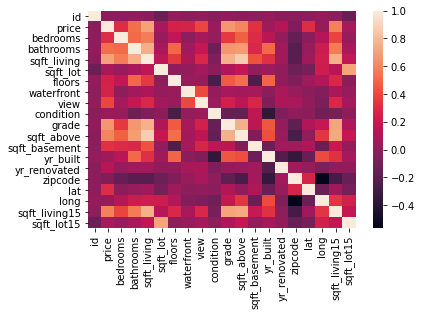

In [13]:
sns.heatmap(corr_df)

Price/bathrooms/sqft_living/grade/sqft_above/sqft_living15 are correlated (important features)
sqft_lot and sqft_lot15 are correlated but not correlated with the price (not important features)

### 2. Write a paragraph selecting the most important features (feature selection). 

#### Recap
This dataset consists of house prices from King County an area in the US State of Washington, this data also covers Seattle. 
All Variables are numerical.
The target variable is the price and the others variables are features.
There is a correlation between the price and:
-bathrooms: Number of bathrooms/bedrooms
-grade: overall grade given to the housing unit, based on King County grading system. 1 poor ,13 excellent
-sqftabove: square footage of house apart from basement
-sqftliving15: Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area.
That's why it would be wise to select these features in odrer to predict the price.
It is important to note that the highest correlation rate was bestween the price and sqft_living, let's try to apply a linear regression where the target is the price and the features are sqft_living.

### 3. Split your dataset into a training set and a testing set. 

In [14]:
# import librairies
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [15]:
# extract x and y from our data
y=data["price"].values
x=data["sqft_living"].values.reshape(-1,1)
# splitting the data with test size = 35%
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.35, random_state=0)

### 4. Apply linear regression to your training set. 

In [16]:
model=LinearRegression() # build linear regression
model.fit(x_train, y_train) # fitting the training set

LinearRegression()

### 5. Plot the linear regression. 

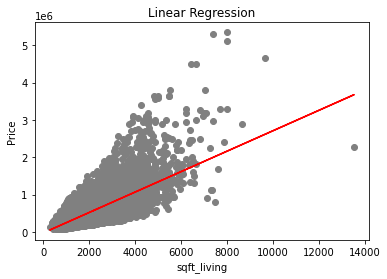

In [17]:
plt.scatter(x_train,y_train, color="gray")
plt.title("Linear Regression")
plt.ylabel("Price")
plt.xlabel("sqft_living")
plt.plot(x_train, model.predict(x_train), color="r")
plt.show()

The relationship between the price and sqft_living seems to be non-linear, we should try polynomial transformation!!!!

### 6. Measure the performance of linear regression using the testing set. 

In [18]:
predicted=model.predict(x_test) # test our model's performance
print("MSE:", mean_squared_error(y_test, predicted))
print("R squared:", metrics.r2_score(y_test, predicted))

MSE: 71815378556.95616
R squared: 0.5004833462267156


R2=0.5 this model doesn't explain the variance of the price proprely!!!!
let's try the other selected features, do they do better than sqft_living?

In [19]:
features=["sqft_living","bathrooms","grade","sqft_above","sqft_living15"]
for f in features:
    # extract x and y from our data
    y=data["price"].values
    x=data[f].values.reshape(-1,1)
    # splitting the data with test size = 35%
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.35, random_state=0)
    model=LinearRegression() # build linear regression
    model.fit(x_train, y_train) # fitting the training set
    predicted=model.predict(x_test) # test our model's performance
    print("Linear Regression with", f)
    print("MSE:", mean_squared_error(y_test, predicted))
    print("R squared:", metrics.r2_score(y_test, predicted))
    print("-------------------------------------------")

Linear Regression with sqft_living
MSE: 71815378556.95616
R squared: 0.5004833462267156
-------------------------------------------
Linear Regression with bathrooms
MSE: 102883474897.95119
R squared: 0.28438713069187926
-------------------------------------------
Linear Regression with grade
MSE: 79697851477.50403
R squared: 0.44565628027164494
-------------------------------------------
Linear Regression with sqft_above
MSE: 90316877604.99568
R squared: 0.37179493602865876
-------------------------------------------
Linear Regression with sqft_living15
MSE: 95326364823.81477
R squared: 0.33695111367548436
-------------------------------------------


Each feature by itself is incapable of explaining the variance of the price!!!
would it be better if we include all those features in our model?

### 7. Apply multiple-linear regression and compare it to the linear model. 

In [24]:
# create a dataset with the important feature
df=data[["price","bathrooms","sqft_living","grade","sqft_above","sqft_living15"]]
# extract x and y from our data
y=df["price"].values
x=df.iloc[:,1:]
# splitting the data with test size = 35%
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.35, random_state=0)
model=LinearRegression() # build linear regression
model.fit(x_train, y_train) # fitting the training set
predicted=model.predict(x_test) # test our model's performance
print("MSE:", mean_squared_error(y_test, predicted))
print("R squared:", metrics.r2_score(y_test, predicted))

MSE: 65140396790.24522
R squared: 0.5469116269529776


Well R2 is better and MSE is lesser!!!
but R2=0.54, our model, still, doesn't explain proprly the variance of the price!!!

Linear regression analysis has five key assumptions. These are:

We are investigating a linear relationship
All variables follow a normal distribution
There is very little or no multicollinearity
There is little or no autocorrelation
Data is homoscedastic

##### Linearity

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


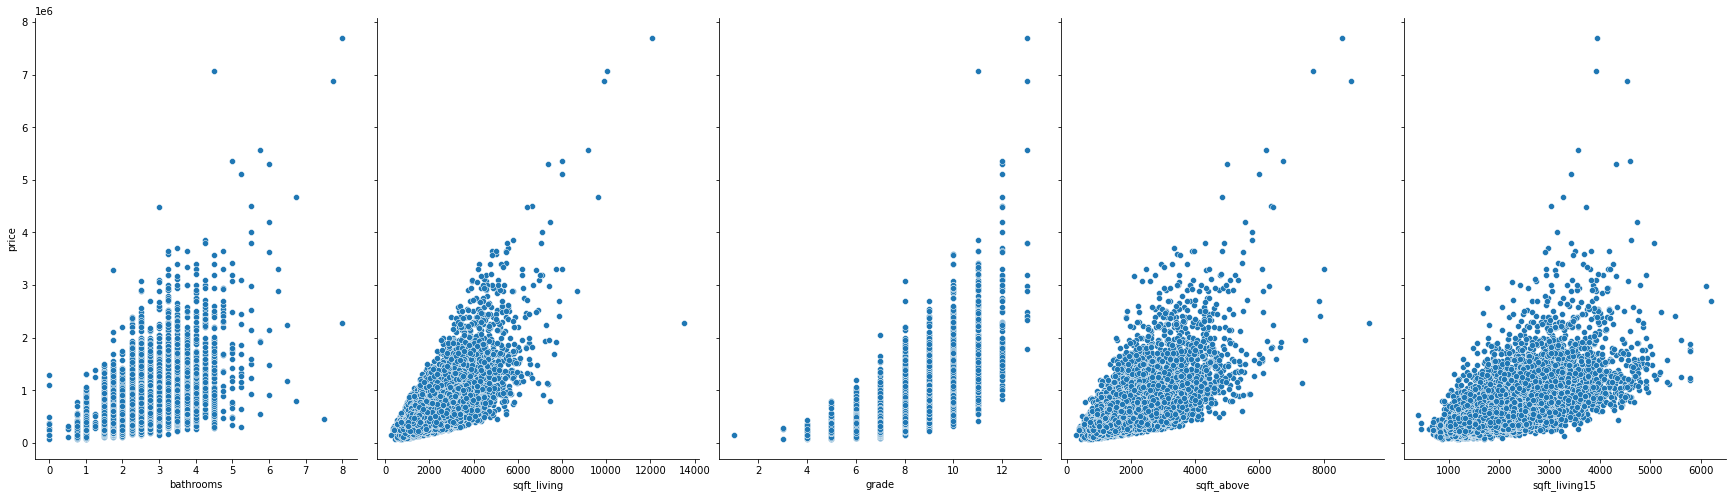

In [25]:
# visualize the relationship between the features and the response using scatterplots
p = sns.pairplot(df, x_vars=["bathrooms","sqft_living","grade","sqft_above","sqft_living15"], y_vars='price', size=7, aspect=0.7)

#### Mean of residuals

In [42]:
residuals = y_train - model.predict(x_train)
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals 4.176631705636044e-12


#### Homoscedasticity

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


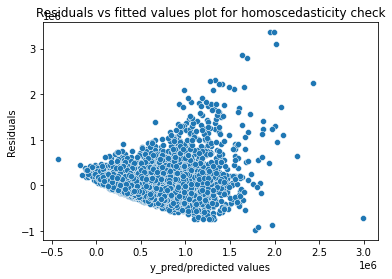

In [46]:
p = sns.scatterplot(model.predict(x_train),residuals)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

#### Normality of error terms/residuals

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


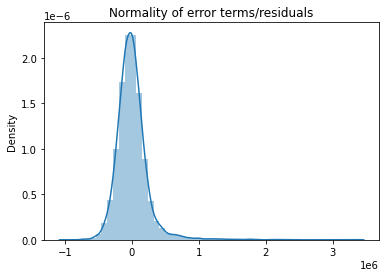

In [47]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

#### No autocorrelation of residuals

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


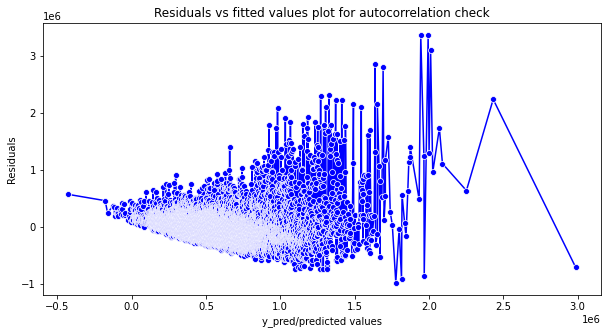

In [50]:
plt.figure(figsize=(10,5))
p = sns.lineplot(model.predict(x_train),residuals,marker='o',color='blue')
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
p = plt.title('Residuals vs fitted values plot for autocorrelation check')

Not all criteria were achieved by this model especially homosedasticity and errors independance!!! 
let's check for multicolinearity!!!

### VIF

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# the independent variables set
X = df

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)


         feature        VIF
0          price   6.276878
1      bathrooms  21.003437
2    sqft_living  42.171478
3          grade  23.862433
4     sqft_above  25.935065
5  sqft_living15  25.201499


oops!!! There is multicolinearity between the variables!!! Maybe we should eliminate more features from our model!!!

In [56]:
# create a dataset with the important feature
df=data[["price","bathrooms","sqft_living","grade"]]
# extract x and y from our data
y=df["price"].values
x=df.iloc[:,1:]
# splitting the data with test size = 35%
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.35, random_state=0)
model=LinearRegression() # build linear regression
model.fit(x_train, y_train) # fitting the training set
predicted=model.predict(x_test) # test our model's performance
print("MSE:", mean_squared_error(y_test, predicted))
print("R squared:", metrics.r2_score(y_test, predicted))

MSE: 65950233754.935135
R squared: 0.5412787519499864


In [57]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# the independent variables set
X = df

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

       feature        VIF
0        price   6.248742
1    bathrooms  20.869824
2  sqft_living  21.265741
3        grade  15.450688


### 8. Apply polynomial regression and compare it to linear and multilinear regression. 

#### a. Apply polynomial regression to every selected feature 

In [21]:
# import libraries 
from sklearn.preprocessing import PolynomialFeatures
features=["sqft_living","bathrooms","grade","sqft_above","sqft_living15"]
for f in features:
    # extract x and y from our data
    y=data["price"].values
    x=data[f].values.reshape(-1,1)
    # splitting the data with test size = 35%
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.35, random_state=0)
    lg=LinearRegression()
    print("\n")
    print("Polynomial Regression with",f,"\n")
    for i in range (2,11):
        poly=PolynomialFeatures(degree=i)
        # transformation to polynmial
        x_train_fit=poly.fit_transform(x_train)
        # fitting the model
        lg.fit(x_train_fit, y_train)
        # testing the model
        x_test_=poly.fit_transform(x_test)
        predicted=lg.predict(x_test_)
        print("---------Polynomial Degree", i,"--------------")
        print("MSE:", mean_squared_error(y_test, predicted))
        print("R squared:", metrics.r2_score(y_test, predicted))



Polynomial Regression with sqft_living 

---------Polynomial Degree 2 --------------
MSE: 63032823573.8697
R squared: 0.5615709929798678
---------Polynomial Degree 3 --------------
MSE: 65571736192.911545
R squared: 0.5439114169785977
---------Polynomial Degree 4 --------------
MSE: 64668361418.637474
R squared: 0.5501949004526936
---------Polynomial Degree 5 --------------
MSE: 64513571548.43703
R squared: 0.5512715517153366
---------Polynomial Degree 6 --------------
MSE: 62133111708.6362
R squared: 0.5678289988459111
---------Polynomial Degree 7 --------------
MSE: 61485506055.373276
R squared: 0.5723334631456571
---------Polynomial Degree 8 --------------
MSE: 97567626069.56197
R squared: 0.32136187164678054
---------Polynomial Degree 9 --------------
MSE: 299199487188.2246
R squared: -1.081101981971912
---------Polynomial Degree 10 --------------
MSE: 1076096115205.9165
R squared: -6.484858276974498


Polynomial Regression with bathrooms 

---------Polynomial Degree 2 ----------

For each selected feature taken apart, polynomial regression with degree 7 has the best R2.(R2=0.57) and the lowest MSE using "sqft_living" as a features.
Would it be better if we apply polynomial regression with all selected features? 

#### b. Apply muti-polynomial regression to all the features together 

In [22]:
# import libraries 
from sklearn.preprocessing import PolynomialFeatures
# create a dataset with the important feature
df=data[["price","bathrooms","sqft_living","grade","sqft_above","sqft_living15"]]
# extract x and y from our data
y=df["price"].values
x=df.iloc[:,1:]
# splitting the data with test size = 35%
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.35, random_state=0)
lg=LinearRegression()
print("-------Multi-polynomial Regression---------\n")
for i in range (2,11):
    poly=PolynomialFeatures(degree=i)
    # transformation to polynmial
    x_train_fit=poly.fit_transform(x_train)
    # fitting the model
    lg.fit(x_train_fit, y_train)
    # testing the model
    x_test_=poly.fit_transform(x_test)
    predicted=lg.predict(x_test_)
    print("---------Polynomial Degree", i,"--------------")
    print("MSE:", mean_squared_error(y_test, predicted))
    print("R squared:", metrics.r2_score(y_test, predicted))

-------Multi-polynomial Regression---------

---------Polynomial Degree 2 --------------
MSE: 53086758726.19068
R squared: 0.6307515101720796
---------Polynomial Degree 3 --------------
MSE: 54163970458.436485
R squared: 0.6232588921464015
---------Polynomial Degree 4 --------------
MSE: 65196251910.54377
R squared: 0.5465231229396552
---------Polynomial Degree 5 --------------
MSE: 119852229215.12358
R squared: 0.16635982866362997
---------Polynomial Degree 6 --------------
MSE: 7604857882326.656
R squared: -51.89609604701086
---------Polynomial Degree 7 --------------
MSE: 438675236323850.5
R squared: -3050.234854494402
---------Polynomial Degree 8 --------------
MSE: 721737416252915.1
R squared: -5019.092719885993
---------Polynomial Degree 9 --------------
MSE: 1.6823515150543482e+16
R squared: -117016.08132108208
---------Polynomial Degree 10 --------------
MSE: 1.4735035952449231e+18
R squared: -10249051.501142237


The best R2 was found in degree 2 for multi-polynomial regression (R2=0.63) which was better than simple and multi-linear regression and also better than polynomial regression with sqft_living solely. MSE has confirmed these findings.

In [75]:
d={
    "linear regression with sqft_living":{"MSE": 71815378556.95616,
        "R2": 0.5004833462267156},
    "multi-linear regression":{"MSE": 65140396790.24522,
          "R2": 0.5469116269529776},
    "Polynomial regression (degree=7) with sqft_living":{"MSE": 61485506055.373276,
           "R2": 0.5723334631456571},
    "Polynomial regression (degree=2) with the selected features":{"MSE": 53086758726.19068,
           "R2": 0.6307515101720796}
  }

d=pd.DataFrame.from_dict(d)
d.stack()

MSE  linear regression with sqft_living                             7.181538e+10
     multi-linear regression                                        6.514040e+10
     Polynomial regression (degree=7) with sqft_living              6.148551e+10
     Polynomial regression (degree=2) with the selected features    5.308676e+10
R2   linear regression with sqft_living                             5.004833e-01
     multi-linear regression                                        5.469116e-01
     Polynomial regression (degree=7) with sqft_living              5.723335e-01
     Polynomial regression (degree=2) with the selected features    6.307515e-01
dtype: float64

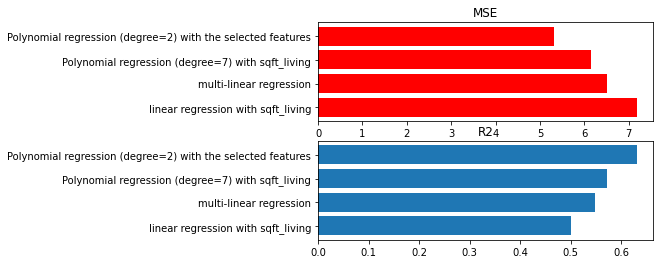

In [123]:
Models=["linear regression with sqft_living","multi-linear regression","Polynomial regression (degree=7) with sqft_living",
        "Polynomial regression (degree=2) with the selected features"]
MSE=[7.181538e+10,6.514040e+10,6.148551e+10,5.308676e+10]
R2=[5.004833e-01,5.469116e-01,5.723335e-01,6.307515e-01]
plt.subplots(1,2)
ax1=plt.subplot(2,1,1)
plt.barh(Models, MSE, color="r")
plt.title("MSE")
ax2=plt.subplot(2,1,2)
plt.barh(Models, R2)
plt.title("R2")
plt.show()

In conclusion, the best model for this dataset is multi-polynomial regression with degree 2 using "sqft_living","bathrooms","grade","sqft_above" and "sqft_living15"